In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

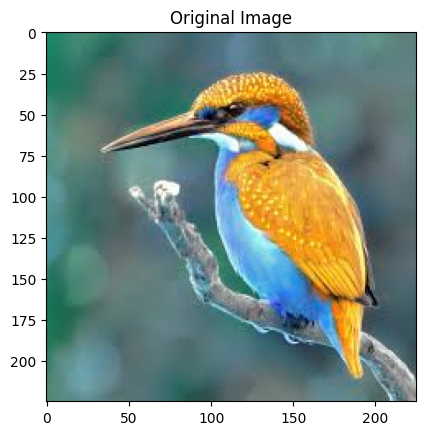

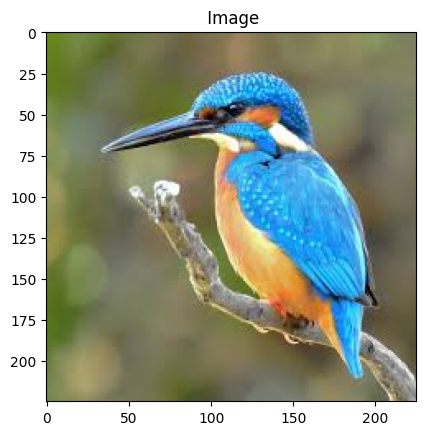

In [10]:
imageo = cv2.imread('images.jpg')

# Display the original image
plt.imshow(imageo)
plt.title('Original Image')
plt.show()

imagec = cv2.cvtColor(imageo, cv2.COLOR_BGR2RGB)


plt.imshow(imagec)
plt.title(' Image')
plt.show()

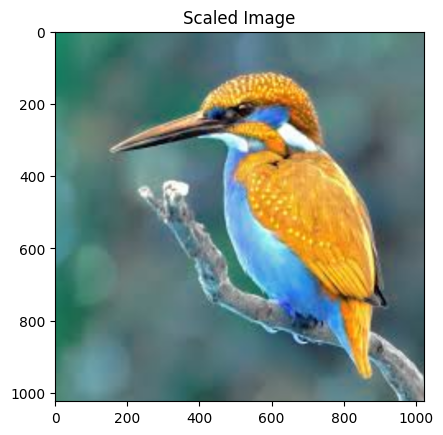

In [8]:
# Resize the image for faster processing
scaled_image = cv2.resize(imageo, (1024, 1024))

# Display the scaled image
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.show()

In [13]:
mask = np.zeros(scaled_image.shape[:2], np.uint8)
#(x, y, width, height)
rect = (10, 10, scaled_image.shape[1] - 20, scaled_image.shape[0] - 20)

In [14]:
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

cv2.grabCut(scaled_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 1.47676139e-01,  3.35868480e-01,  2.84006343e-01,
          6.28067555e-02,  1.69642283e-01,  5.22774737e+01,
          1.18844484e+02,  1.02132213e+02,  9.55479256e+01,
          1.30257749e+02,  1.30243764e+02,  8.21214587e+01,
          1.13042899e+02,  1.16795181e+02,  9.41819396e+01,
          1.06506857e+02,  1.09076654e+02,  6.36340145e+01,
          9.58078784e+01,  1.01271392e+02,  2.28494772e+02,
          6.76072553e+01,  1.18577754e+02,  6.76072553e+01,
          1.06967842e+02,  7.58571202e+01,  1.18577754e+02,
          7.58571202e+01,  9.62097994e+01,  5.24539439e+01,
         -1.54126734e+01, -2.72143991e+01, -1.54126734e+01,
          7.50466361e+01,  5.85486065e+01, -2.72143991e+01,
          5.85486065e+01,  1.08461360e+02,  3.66356717

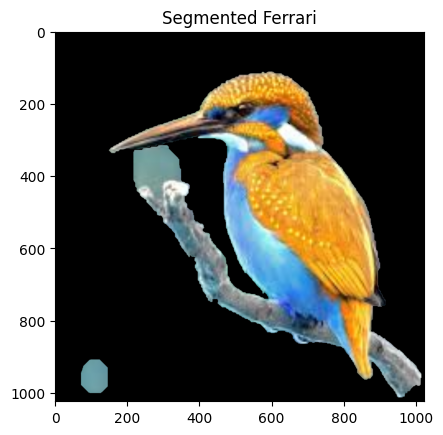

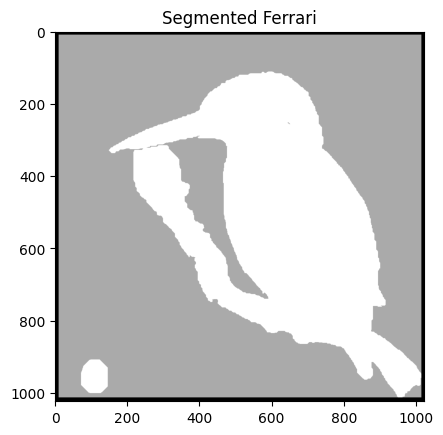

In [18]:
#cv2.grabCut(scaled_image, mask, None, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_MASK)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = scaled_image * mask2[:, :, np.newaxis]

# Display the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Ferrari')
plt.show()
# Display the mask image
plt.imshow(mask , cmap='gray')
plt.title('Segmented Ferrari')
plt.show()
